In [56]:
#imports
import pandas as pd 
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer, OneHotEncoder

In [57]:
url = 'marketing_customer_analysis_clean (3).csv'
df = pd.read_csv(url)
df = df.drop(columns = ["unnamed:_0", "customer", "effective_to_date"])
df

,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,Arizona,4809.216960,No,Basic,College,Employed,M,48029,Suburban,Married,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,California,2228.525238,No,Basic,College,Unemployed,F,0,Suburban,Single,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,Washington,14947.917300,No,Basic,Bachelor,Employed,M,22139,Suburban,Single,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,Oregon,22332.439460,Yes,Extended,College,Employed,M,49078,Suburban,Single,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,Oregon,9025.067525,No,Premium,Bachelor,Medical Leave,F,23675,Suburban,Married,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,15563.369440,No,Premium,Bachelor,Unemployed,F,0,Suburban,Married,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,Oregon,5259.444853,No,Basic,College,Employed,F,61146,Urban,Married,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,Arizona,23893.304100,No,Extended,Bachelor,Employed,F,39837,Rural,Married,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,A,2
10908,California,11971.977650,No,Premium,College,Employed,F,64195,Urban,Divorced,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


In [58]:
#retrieves the categorical and numerical data types
categoricals_df = df.select_dtypes(include='object')
numericals_df = df.select_dtypes(include='number')

In [59]:

ordinals = categoricals_df[["coverage","education","vehicle_size"]]
nominals = categoricals_df.drop(columns=["coverage","education","vehicle_size"])
nominals


,state,response,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_type
0,Arizona,No,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,A
1,California,No,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,A
2,Washington,No,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,A
3,Oregon,Yes,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,A
4,Oregon,No,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,A
...,...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,No,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,A
10906,Oregon,No,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,A
10907,Arizona,No,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,A
10908,California,No,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,A


In [60]:
#creates a dummy DF for the norminal_df from the categorical_df
nominal_df = pd.get_dummies(categoricals_df[["state", "response","employmentstatus","gender", "location_code", "marital_status", "policy_type", "policy", "renew_offer_type", "sales_channel", "vehicle_class", "vehicle_type"]], dtype=int)
nominal_df

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,employmentstatus_Disabled,employmentstatus_Employed,employmentstatus_Medical Leave,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_type_A
0,1,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,1,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2,0,0,0,0,1,1,0,0,1,0,...,0,1,0,0,0,0,1,0,0,1
3,0,0,0,1,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,1
4,0,0,0,1,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
10906,0,0,0,1,0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
10907,1,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
10908,0,1,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,1


In [61]:
#create ordinal-df from the categorical_df
ordinal_df = categoricals_df[["education", "vehicle_size", "coverage"]]
ordinal_df

,education,vehicle_size,coverage
0,College,Medsize,Basic
1,College,Medsize,Basic
2,Bachelor,Medsize,Basic
3,College,Medsize,Extended
4,Bachelor,Medsize,Premium
...,...,...,...
10905,Bachelor,Medsize,Premium
10906,College,Medsize,Basic
10907,Bachelor,Medsize,Extended
10908,College,Medsize,Premium


In [62]:
from sklearn.preprocessing import OrdinalEncoder

In [63]:
enc = OrdinalEncoder(categories=[["Basic","Extended","Premium"]])

ordinal_df["coverage"] = enc.fit_transform(ordinals[["coverage"]])

enc = OrdinalEncoder(categories=[["High School or Below", "College", "Bachelor", "Master", "Doctor"]])

ordinal_df["education"] = enc.fit_transform(ordinals[["education"]])

enc = OrdinalEncoder(categories=[["Small", "Medsize", "Large"]])

ordinal_df["vehicle_size"] = enc.fit_transform(ordinals[["vehicle_size"]])

C:\Users\Leih-Pool\AppData\Local\Temp\ipykernel_22256\1310146879.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinal_df["coverage"] = enc.fit_transform(ordinals[["coverage"]])
C:\Users\Leih-Pool\AppData\Local\Temp\ipykernel_22256\1310146879.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinal_df["education"] = enc.fit_transform(ordinals[["education"]])
C:\Users\Leih-Pool\AppData\Local\Temp\ipykernel_22256\1310146879.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [64]:
ordinal_df

,education,vehicle_size,coverage
0,1.0,1.0,0.0
1,1.0,1.0,0.0
2,2.0,1.0,0.0
3,1.0,1.0,1.0
4,2.0,1.0,2.0
...,...,...,...
10905,2.0,1.0,2.0
10906,1.0,1.0,0.0
10907,2.0,1.0,1.0
10908,1.0,1.0,2.0


In [65]:
final_df = pd.concat([numericals_df,ordinal_df,nominal_df], axis=1)
final_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month,education,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_type_A
0,4809.216960,48029,61,7.000000,52,0.000000,9,292.800000,2,1.0,...,0,0,0,1,0,0,0,0,0,1
1,2228.525238,0,64,3.000000,26,0.000000,1,744.924331,1,1.0,...,0,1,0,1,0,0,0,0,0,1
2,14947.917300,22139,100,34.000000,31,0.000000,2,480.000000,2,2.0,...,0,1,0,0,0,0,1,0,0,1
3,22332.439460,49078,97,10.000000,3,0.000000,2,484.013411,1,1.0,...,1,0,0,1,0,0,0,0,0,1
4,9025.067525,23675,117,15.149071,31,0.384256,7,707.925645,1,2.0,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,15.149071,40,0.384256,7,1214.400000,1,2.0,...,0,0,1,0,1,0,0,0,0,1
10906,5259.444853,61146,65,7.000000,68,0.000000,6,273.018929,1,1.0,...,1,0,0,1,0,0,0,0,0,1
10907,23893.304100,39837,201,11.000000,63,0.000000,2,381.306996,2,2.0,...,0,0,1,0,0,1,0,0,0,1
10908,11971.977650,64195,158,0.000000,27,4.000000,6,618.288849,2,1.0,...,1,0,0,0,0,0,1,0,0,1


# Run the 2nd iteration of the model, adding the categorical data

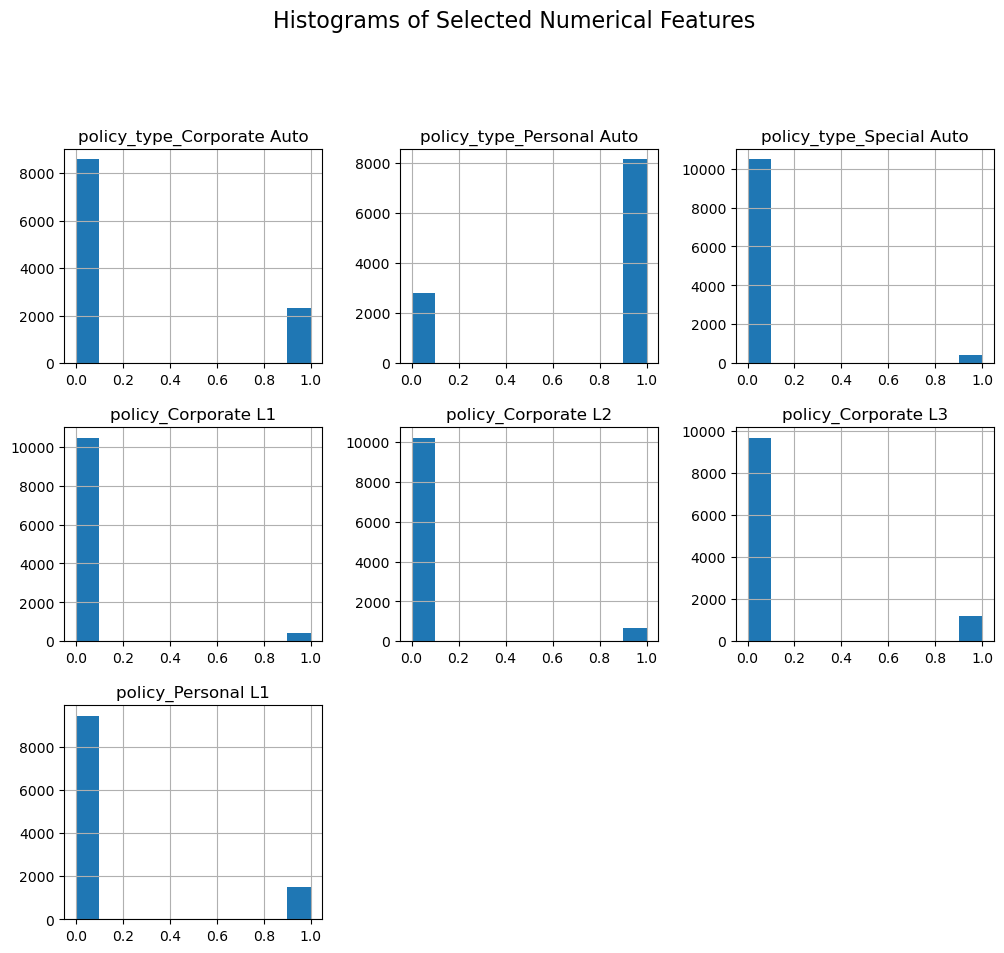

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Display histograms for specific numerical columns
selected_columns = [ 'policy_type_Corporate Auto', 'policy_type_Personal Auto',
       'policy_type_Special Auto', 'policy_Corporate L1',
       'policy_Corporate L2', 'policy_Corporate L3', 'policy_Personal L1',
      ]



#.hist() is a pandas method used to plot histograms for the selected columns.
#bins=10 specifies the number of bins (intervals) for each histogram.
#figsize=(12, 10) sets the size of the overall figure to be 12 units wide and 10 units high.
#layout=(3, 3) indicates that the histograms should be arranged in a 3x3 grid (3 rows, 3 columns).
#sharex=False ensures that each subplot has its own x-axis.
final_df[selected_columns].hist(bins=10, figsize=(12, 10), layout=(3, 3), sharex=False)

#plt.suptitle() is a Matplotlib function used to add a centered title to the entire figure.
#The title is set to 'Histograms of Selected Numerical Features'.
#y=1.02 adjusts the vertical position of the title, placing it slightly above the default position.
#fontsize=16 sets the font size of the title to 16 points.
plt.suptitle('Histograms of Selected Numerical Features', y=1.02, fontsize=16)

#Displays the histograms
plt.show()

In [67]:
#drop null values
#final_df = final_df.dropna()

In [68]:
#drop duplicates
#final_df = numericals_df.drop_duplicates()

In [69]:
final_df.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'total_claim_amount',
       'month', 'education', 'vehicle_size', 'coverage', 'state_Arizona',
       'state_California', 'state_Nevada', 'state_Oregon', 'state_Washington',
       'response_No', 'response_Yes', 'employmentstatus_Disabled',
       'employmentstatus_Employed', 'employmentstatus_Medical Leave',
       'employmentstatus_Retired', 'employmentstatus_Unemployed', 'gender_F',
       'gender_M', 'location_code_Rural', 'location_code_Suburban',
       'location_code_Urban', 'marital_status_Divorced',
       'marital_status_Married', 'marital_status_Single',
       'policy_type_Corporate Auto', 'policy_type_Personal Auto',
       'policy_type_Special Auto', 'policy_Corporate L1',
       'policy_Corporate L2', 'policy_Corporate L3', 'policy_Personal L1',
       'policy_Personal L2', 'polic

In [71]:
#X-y split (y is the target variable, in this case, "total claim amount")
X = final_df[['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'month', 'education', 'vehicle_size', 'coverage', 'state_Arizona',
       'state_California', 'state_Nevada', 'state_Oregon', 'state_Washington',
       'response_No', 'response_Yes', 'employmentstatus_Disabled',
       'employmentstatus_Employed', 'employmentstatus_Medical Leave',
       'employmentstatus_Retired', 'employmentstatus_Unemployed', 'gender_F',
       'gender_M', 'location_code_Rural', 'location_code_Suburban',
       'location_code_Urban', 'marital_status_Divorced',
       'marital_status_Married', 'marital_status_Single',
       'policy_type_Corporate Auto', 'policy_type_Personal Auto',
       'policy_type_Special Auto', 'policy_Corporate L1',
       'policy_Corporate L2', 'policy_Corporate L3', 'policy_Personal L1',
       'policy_Personal L2', 'policy_Personal L3', 'policy_Special L1',
       'policy_Special L2', 'policy_Special L3', 'renew_offer_type_Offer1',
       'renew_offer_type_Offer2', 'renew_offer_type_Offer3',
       'renew_offer_type_Offer4', 'sales_channel_Agent',
       'sales_channel_Branch', 'sales_channel_Call Center',
       'sales_channel_Web', 'vehicle_class_Four-Door Car',
       'vehicle_class_Luxury Car', 'vehicle_class_Luxury SUV',
       'vehicle_class_SUV', 'vehicle_class_Sports Car',
       'vehicle_class_Two-Door Car', 'vehicle_type_A']]

y = final_df[["total_claim_amount"]]

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
#Train-test split.
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [74]:
#retrieves the X-train DF; that trains the model
X_train.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month,education,vehicle_size,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_type_A
4716,22217.967960,37553,187,34.0,7,0.0,2,2,1.0,0.0,...,0,0,0,0,1,0,0,0,0,1
8775,8260.639809,33321,105,6.0,2,0.0,3,1,0.0,1.0,...,1,0,0,0,0,0,1,0,0,1
4754,2269.841123,0,68,22.0,43,0.0,1,2,1.0,1.0,...,0,0,0,1,0,0,0,0,0,1
6569,8869.631143,0,119,12.0,57,0.0,4,1,0.0,1.0,...,0,0,0,0,0,0,1,0,0,1
1438,5002.093264,0,70,35.0,56,0.0,3,1,1.0,1.0,...,0,1,0,1,0,0,0,0,0,1


In [75]:
#Retrieves y_test DF; the test target
#Contains the actual target values.
y_test

,total_claim_amount
4829,475.423848
5081,350.400000
5011,482.400000
4625,673.342650
3838,302.400000
...,...
7450,460.266881
4715,405.883346
8581,41.182611
211,364.800000


array([[<Axes: title={'center': 'total_claim_amount'}>]], dtype=object)

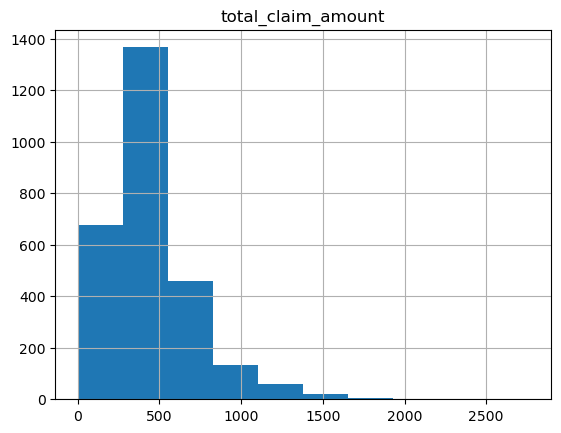

In [76]:
y_test.hist()

In [77]:
#Standardizes the data (after the data split!).
# This transforms each feature individually, scaling it based on the minimum and maximum values present in 
#that particular feature to get a range of values between [0,1]
scaler = MinMaxScaler()

#create the fit/frame
scaler = scaler.fit(X_train)


#transforms the data of X_train and X_test
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[0.24954704, 0.37560136, 0.53164557, ..., 0.        , 0.        ,
        0.        ],
       [0.07813874, 0.33327332, 0.18565401, ..., 0.        , 0.        ,
        0.        ],
       [0.00456644, 0.        , 0.02953586, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.07310297, 0.        , 0.03375527, ..., 0.        , 0.        ,
        0.        ],
       [0.03777879, 0.        , 0.03797468, ..., 0.        , 0.        ,
        0.        ],
       [0.44404234, 0.        , 0.2278481 , ..., 0.        , 0.        ,
        0.        ]])

In [78]:
#Applying linear regression.
from sklearn.linear_model import LinearRegression

In [79]:
#Create and fit a linear regression model
#This calculates the line of best fit
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [80]:
#This displays the coefficient of all the X_train columns
model.coef_

array([[-1.39872353e+01, -3.34319642e+01,  1.24111697e+03,
         8.38377672e+00, -7.04315456e+00, -1.15924887e+01,
         1.75769195e+01, -3.47492443e+00, -1.88745935e+01,
        -9.34483603e+00, -1.52578321e+01, -3.42934002e+14,
        -3.42934002e+14, -3.42934002e+14, -3.42934002e+14,
        -3.42934002e+14, -3.80317521e+13, -3.80317521e+13,
         4.78469433e+13,  4.78469433e+13,  4.78469433e+13,
         4.78469433e+13,  4.78469433e+13,  1.43228313e+15,
         1.43228313e+15, -1.29363878e+15, -1.29363878e+15,
        -1.29363878e+15,  2.62675775e+15,  2.62675775e+15,
         2.62675775e+15,  6.83052748e+14,  9.24904780e+14,
         2.36355637e+14,  1.04313505e+14,  1.04313505e+14,
         1.04313505e+14, -1.37538527e+14, -1.37538527e+14,
        -1.37538527e+14,  5.51010616e+14,  5.51010616e+14,
         5.51010616e+14,  1.11032259e+14,  1.11032259e+14,
         1.11032259e+14,  1.11032259e+14, -3.91725176e+14,
        -3.91725176e+14, -3.91725176e+14, -3.91725176e+1

In [81]:
#Creating predictions for the test set
y_pred = model.predict(X_test)

# inputing y_pred into a df
y_pred = pd.DataFrame(y_pred)

#Displays the DF containing the predicted target values.
y_pred

,0
0,378.5
1,440.5
2,533.0
3,592.5
4,321.5
...,...
2723,563.5
2724,393.0
2725,22.0
2726,490.0


In [82]:
#This resets the index of the y_test pandas Series and drops the old index. 
y_test = y_test.reset_index(drop = True)
y_test

,total_claim_amount
0,475.423848
1,350.400000
2,482.400000
3,673.342650
4,302.400000
...,...
2723,460.266881
2724,405.883346
2725,41.182611
2726,364.800000


In [83]:
#is using the concat function from pandas to concatenate two Series (or DataFrames) along the columns (axis=1). 
#This operation is often done to create a DataFrame that contains both the actual target values  
#(y_test) and the predicted values (y_pred), making it easier to analyze and visualize the residuals.
residuals_market_df = pd.concat([y_test, y_pred], axis = 1)
residuals_market_df

,total_claim_amount,0
0,475.423848,378.5
1,350.400000,440.5
2,482.400000,533.0
3,673.342650,592.5
4,302.400000,321.5
...,...,...
2723,460.266881,563.5
2724,405.883346,393.0
2725,41.182611,22.0
2726,364.800000,490.0


In [84]:
# Rename columns
residuals_market_df = residuals_market_df.rename(columns = {"total_claim_amount":"y_test", 0:"y_pred"})

# This calculates the residuals and adds a new column named "residual" to the DataFrame
residuals_market_df["residual"] = residuals_market_df["y_test"] - residuals_market_df["y_pred"]

#Displays the residuals DF
residuals_market_df

,y_test,y_pred,residual
0,475.423848,378.5,96.923848
1,350.400000,440.5,-90.100000
2,482.400000,533.0,-50.600000
3,673.342650,592.5,80.842650
4,302.400000,321.5,-19.100000
...,...,...,...
2723,460.266881,563.5,-103.233119
2724,405.883346,393.0,12.883346
2725,41.182611,22.0,19.182611
2726,364.800000,490.0,-125.200000


In [85]:
#Displays the first few rows of the DataFrame residuals_market_df after adding the "residual" colum
residuals_market_df.head()

,y_test,y_pred,residual
0,475.423848,378.5,96.923848
1,350.400000,440.5,-90.100000
2,482.400000,533.0,-50.600000
3,673.342650,592.5,80.842650
4,302.400000,321.5,-19.100000


In [86]:
#Calculating metrics

#This method calculates the mean of the values in the "residual" column, providing a single value that represents 
#the average error across all observations. 
mean_error = residuals_market_df["residual"].mean()

#Displays the result which is assigned to the variable mean_error.
mean_error

2.8532817448680357

In [87]:
#imports two error metrics from scikit-learn with abbreviated names:
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae

In [88]:
#This uses the mean squared error (MSE) function from scikit-learn to calculate the mean squared difference between 
#the actual target values (y_test) and the predicted values (y_pred).
mse(y_test, y_pred)

19460.721032463563

In [89]:
#This uses the mean absolute error (MAE) function from scikit-learn to calculate 
#the mean absolute difference between the actual target values (y_test) and the predicted values (y_pred).
mae(y_test, y_pred)

96.34283634530792

In [90]:
# This calculates the Root Mean Squared Error (RMSE) by using the mean_squared_error function 
#from scikit-learn and sets the squared parameter to False.
#shows the differerence of the error in comparison to the average error
rsme = mse(y_test,y_pred, squared = False)
rsme

139.5016882781838

In [91]:
#A measure that explains how good the model is at explaining the target variable
#Explanatory power of the model
#R squared
#R2
from sklearn.metrics import r2_score

In [92]:
r2_test = round(r2_score(y_test,y_pred),2)
r2_test

0.77

In [93]:
y_train_pred = pd.DataFrame(model.predict(X_train))
y_train_pred

,0
0,1065.5
1,565.0
2,518.0
3,677.5
4,547.0
...,...
8177,740.0
8178,596.5
8179,447.5
8180,526.0


In [94]:
r2_train = round(r2_score(y_train, y_train_pred),2)
r2_train

0.77

In [95]:
#fi feature importance based on the variables and coefficient
#features can be gotten list(X_train.columns)
feature_names = list(X.columns)
feature_names

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'month',
 'education',
 'vehicle_size',
 'coverage',
 'state_Arizona',
 'state_California',
 'state_Nevada',
 'state_Oregon',
 'state_Washington',
 'response_No',
 'response_Yes',
 'employmentstatus_Disabled',
 'employmentstatus_Employed',
 'employmentstatus_Medical Leave',
 'employmentstatus_Retired',
 'employmentstatus_Unemployed',
 'gender_F',
 'gender_M',
 'location_code_Rural',
 'location_code_Suburban',
 'location_code_Urban',
 'marital_status_Divorced',
 'marital_status_Married',
 'marital_status_Single',
 'policy_type_Corporate Auto',
 'policy_type_Personal Auto',
 'policy_type_Special Auto',
 'policy_Corporate L1',
 'policy_Corporate L2',
 'policy_Corporate L3',
 'policy_Personal L1',
 'policy_Personal L2',
 'policy_Personal L3',
 'policy_Special L1',
 'policy_Special L2',
 'policy_Special L3',
 'ren

In [96]:
coefficients = model.coef_
coefficients

array([[-1.39872353e+01, -3.34319642e+01,  1.24111697e+03,
         8.38377672e+00, -7.04315456e+00, -1.15924887e+01,
         1.75769195e+01, -3.47492443e+00, -1.88745935e+01,
        -9.34483603e+00, -1.52578321e+01, -3.42934002e+14,
        -3.42934002e+14, -3.42934002e+14, -3.42934002e+14,
        -3.42934002e+14, -3.80317521e+13, -3.80317521e+13,
         4.78469433e+13,  4.78469433e+13,  4.78469433e+13,
         4.78469433e+13,  4.78469433e+13,  1.43228313e+15,
         1.43228313e+15, -1.29363878e+15, -1.29363878e+15,
        -1.29363878e+15,  2.62675775e+15,  2.62675775e+15,
         2.62675775e+15,  6.83052748e+14,  9.24904780e+14,
         2.36355637e+14,  1.04313505e+14,  1.04313505e+14,
         1.04313505e+14, -1.37538527e+14, -1.37538527e+14,
        -1.37538527e+14,  5.51010616e+14,  5.51010616e+14,
         5.51010616e+14,  1.11032259e+14,  1.11032259e+14,
         1.11032259e+14,  1.11032259e+14, -3.91725176e+14,
        -3.91725176e+14, -3.91725176e+14, -3.91725176e+1

In [97]:
coefficients = [i for i in coefficients[0]]

In [104]:
fi_dict = {"names":feature_names, "coeff":coefficients}
fi_df = pd.DataFrame(fi_dict)
fi_df

,names,coeff
0,customer_lifetime_value,-1.398724e+01
1,income,-3.343196e+01
2,monthly_premium_auto,1.241117e+03
3,months_since_last_claim,8.383777e+00
4,months_since_policy_inception,-7.043155e+00
5,number_of_open_complaints,-1.159249e+01
6,number_of_policies,1.757692e+01
7,month,-3.474924e+00
8,education,-1.887459e+01
9,vehicle_size,-9.344836e+00


In [111]:
fi_df_sorted = fi_df.sort_values(by = "coeff", ascending = False)

<Axes: xlabel='coeff', ylabel='names'>

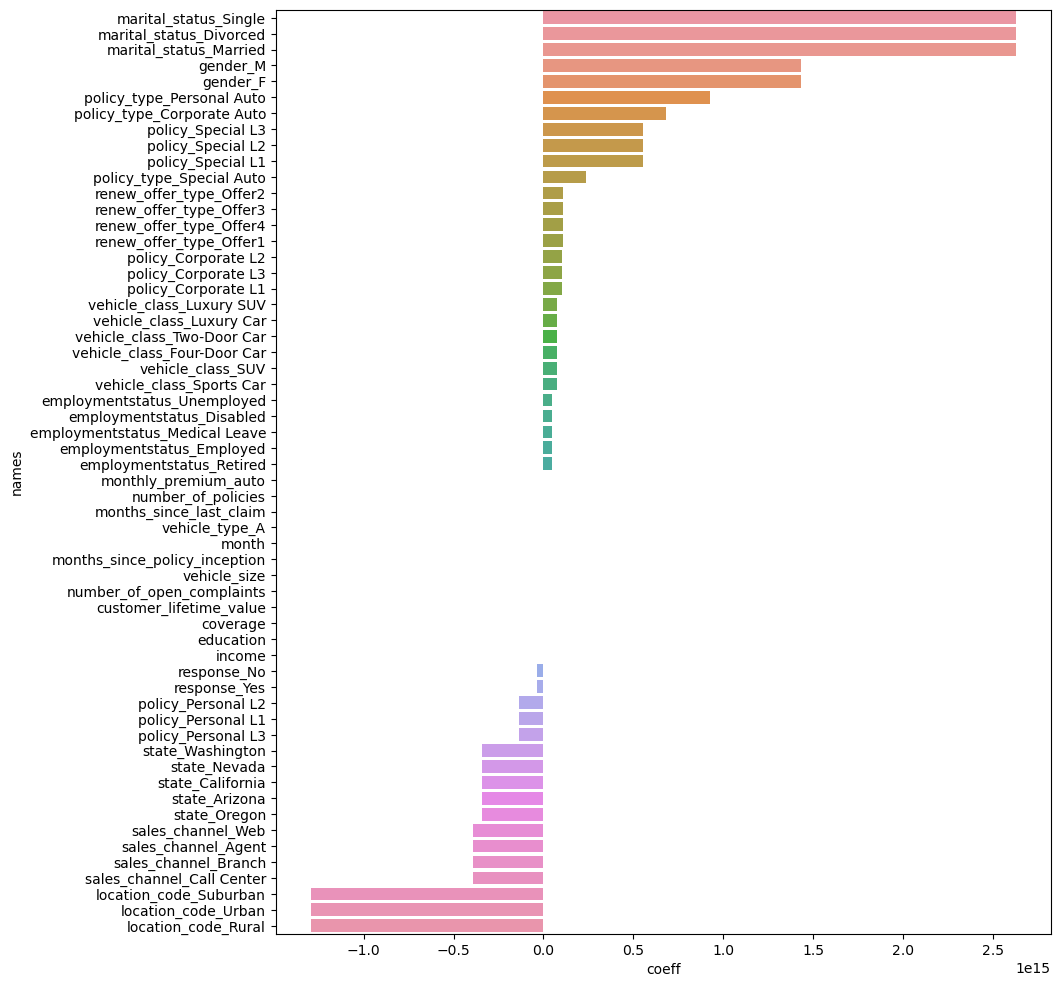

In [114]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,12))
sns.barplot(y = fi_df_sorted["names"], x = fi_df_sorted["coeff"])